In [1]:
# import pandas
import pandas as pd

# import statsmodels.api as sm
import statsmodels.api as sm

# import matplotlib
import matplotlib.pyplot as plt


In [2]:
# load data
data = sm.datasets.co2.load_pandas()
co2 = data.data

* print top 5 rows

In [3]:
co2.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


* Resample timeseries using monthly averages and store the new timeseries as a Series `y`

In [4]:
y = co2.resample('m').sum()

* print top 5 rows of 'y'

In [5]:
y.head()

,co2
1958-03-31,316.1
1958-04-30,1268.8
1958-05-31,952.3
1958-06-30,0.0
1958-07-31,1262.5


* check the missing values

In [6]:
print(len(y))
y = y[y.values > 1200]

526


* replace missing values with last available value
    - if Feb 2010 is missing, use value from Jan 2010.

In [7]:
y = y.fillna(method='bfill')

* plot timeseries `y`

<AxesSubplot:>

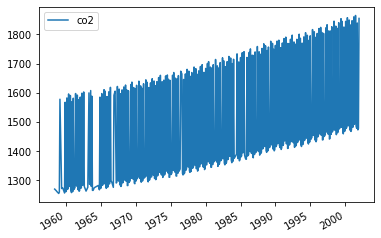

In [8]:
y.plot()

* Apply and plot:
    - additive seasonal decomposition
    - multiplicative seasonal decomposition

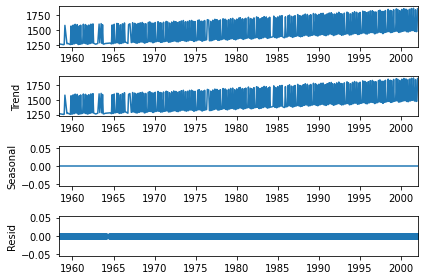

In [9]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(y, model='additive', freq=1)
result.plot()
plt.show()

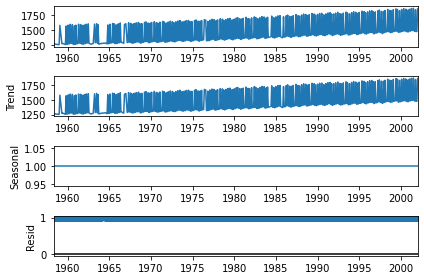

In [10]:
result = seasonal_decompose(y, model='multiplicative', freq=1)
result.plot()
plt.show()